# Regression - Predicting Popularity

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [4]:
data = pd.read_csv("../data/data.csv")

In [6]:
X = data.drop(['popularity','artists','id','name','release_date'],axis=1) #removed this from data
y = data['popularity']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (136522, 14)
Test shape: (34131, 14)


In [8]:
print("Columns in X (features):")
print(X.columns.tolist())

print("\nTarget (y):")
print(y.name)

Columns in X (features):
['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

Target (y):
popularity


## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
reg.score(X_test_scaled,y_test)

0.7593584599436454

In [18]:
y_pred = reg.predict(X_test_scaled)

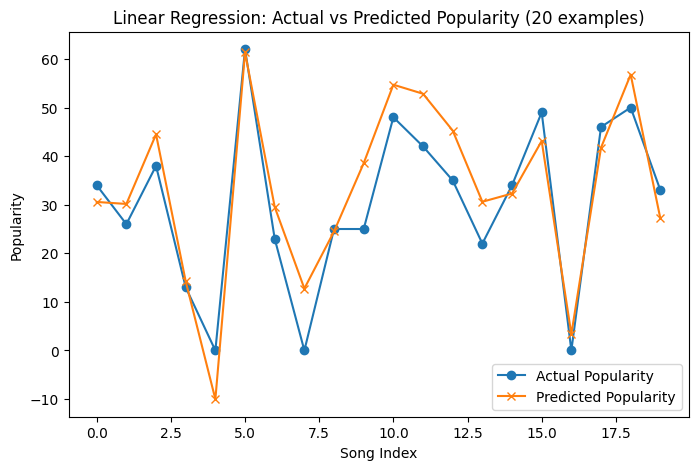

In [24]:
import matplotlib.pyplot as plt

y_test_sample = y_test[:20].values
y_pred_sample = y_pred[:20]

plt.figure(figsize=(8,5))
plt.plot(range(20), y_test_sample, marker='o', label="Actual Popularity")
plt.plot(range(20), y_pred_sample, marker='x', label="Predicted Popularity")

plt.title("Linear Regression: Actual vs Predicted Popularity (20 examples)")
plt.xlabel("Song Index")
plt.ylabel("Popularity")
plt.legend()
plt.show()